In [30]:
import pandas as pd
xl = pd.ExcelFile("dognition_data_aggregated_by_dogid.xlsx")
# xlrd is used by pandas
xl.sheet_names
df = xl.parse("dog_id_max_ranks")
# df.head()

print df.shape
print
print df.isnull().values.any()
print
print df.isnull().sum().sum()
print
print df.isnull().sum()

(17986, 30)

True

30500

Dog ID                                                0
Total Tests Completed                                 0
Mean ITI (days)                                    1268
Mean ITI (minutes)                                 1268
Median ITI (days)                                  1268
Median ITI (minutes)                               1268
Time diff between first and last game (days)          0
Time diff between first and last game (minutes)       0
User ID                                               1
Gender                                                1
Birthday                                              1
Breed                                                16
Breed_Type                                            1
Breed_Group                                           1
Weight                                                1
Dog_Fixed                                             1
DNA_Tested                                            1
Dimension             

In [31]:
import numpy as np

# np.ptp(np.sum(df.isnull().values, axis = 1), axis=0)
print [min(np.sum(df.isnull().values, axis = 1)), max(np.sum(df.isnull().values, axis = 1))]
print

num = np.sum(df.isnull().values, axis = 1).tolist()

l1 = list(set(num))
l1.sort()

fre = {i:num.count(i) for i in l1}
# print fre
# print

dt = pd.DataFrame(fre.items(), columns=['Number of NaNs', 'Count'])
# or list(fre.items()) in python 3

print dt

[0, 22]

   Number of NaNs  Count
0               0  11145
1               1     46
2               2     19
3               3     89
4               4   5832
5               5      8
6               7      9
7               8    837
8              22      1


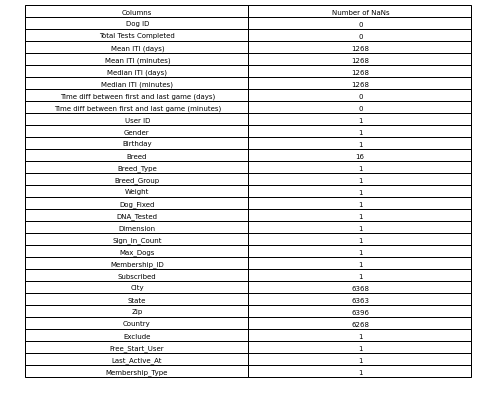

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

s = df.isnull().sum()
s.index.name = 'Columns'
# print s.reset_index()
clust_data = s.reset_index().values
# print type(clust_data)
colLable= ['Columns','Number of NaNs']
nrows, ncols = len(clust_data)+1, len(colLable)
# print nrows
# print ncols
hcell, wcell = 0.21, 4
hpad, wpad = 0, 0    
fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
ax = fig.add_subplot(111)
ax.axis('off')
#do the table
the_table = ax.table(cellText=clust_data,
          colLabels=colLable,
          cellLoc = 'center', rowLoc = 'center', loc='center')
plt.savefig("column_table.png")
plt.show()

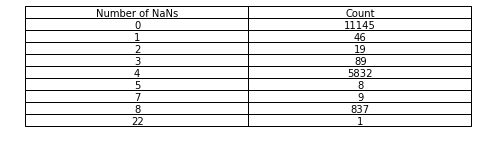

In [33]:
clust_data = dt.values
# print type(dt.values)
# print dt.shape
# print dt.columns
temp = [i for i in dt.columns]
# print temp
colLable= temp
nrows, ncols = len(clust_data)+1, len(colLable)
# print nrows
# print ncols
hcell, wcell = 0.2, 4
hpad, wpad = 0, 0    
fig=plt.figure(figsize=(ncols*wcell+wpad, nrows*hcell+hpad))
ax = fig.add_subplot(111)
ax.axis('off')
#do the table
the_table = ax.table(cellText=clust_data,
          colLabels=colLable,
          cellLoc = 'center', rowLoc = 'center', loc='center')
# the_table.set_zorder(10)
# the_table.set_fontsize(15)
# plt.show()

plt.savefig("sample_table.png")
plt.show()